In [17]:
print('Sheema Zainab M I 19MID0014')
print('Association Analysis in Python')

Sheema Zainab M I 19MID0014
Association Analysis in Python


In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\sheem\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')

In [22]:
df.head(10)


,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [31]:

item = set()
for col in df:
    item.update(df[col].unique())
print(item)

{nan, 'Meat', 'Bread', 'Pencil', 'Bagel', 'Diaper', 'Wine', 'Eggs', 'Cheese', 'Milk'}


In [32]:
items=set(x for x in item if pd.isnull(x)==False)
print(items)

{'Meat', 'Pencil', 'Eggs', 'Diaper', 'Cheese', 'Wine', 'Bread', 'Bagel', 'Milk'}


In [33]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [34]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 111 combinations | Sampling itemset size 3


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.476190,(Meat)
3,0.361905,(Pencil)
4,0.438095,(Eggs)
5,0.406349,(Diaper)
6,0.438095,(Wine)


In [35]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
4,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891


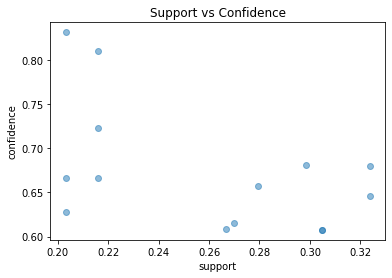

In [36]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

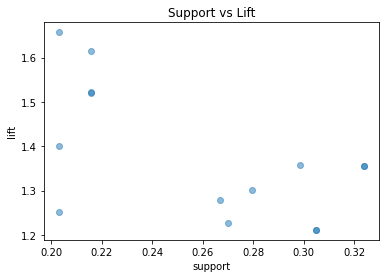

In [37]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

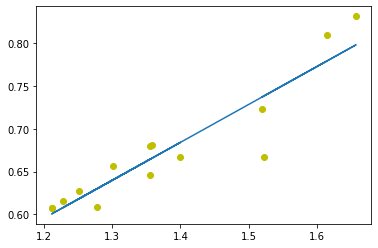

In [38]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))